<a href="https://colab.research.google.com/github/Kaitale/HI-KC/blob/master/GC_Analysis_Gulu_1day.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Daily Rainfall data analysis: Gulu

In [4]:
!pip install pyhomogeneity

In [5]:
# Importing all the necessary libraries into this environment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style
import statsmodels.api as sm
from scipy import stats
import scipy.stats as sp
from scipy.stats import genextreme
import math
from sklearn import linear_model
from scipy.stats import kurtosis
import pyhomogeneity as hg
%matplotlib inline

# Read File

In [6]:
# Loading data
rf2= pd.read_csv('daily_data1.csv', na_values=[-9999],squeeze= True, parse_dates=True,index_col='date')
rf = rf2.sort_index(axis=0)
#rf.head(5)

FileNotFoundError: ignored

# # Homogeneity tests: Gulu rainfall

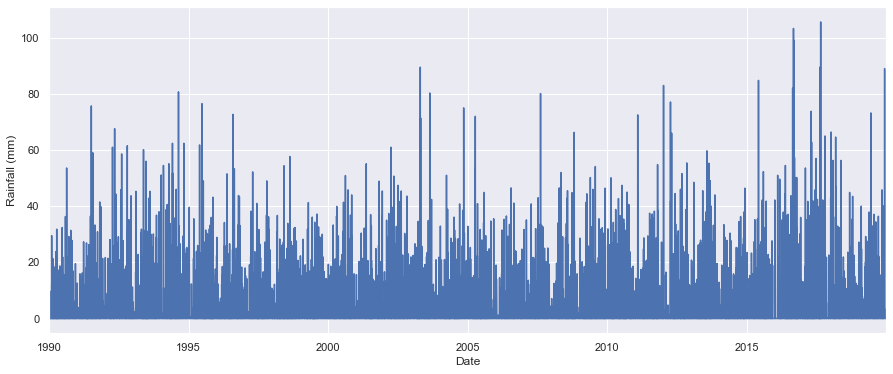

In [ ]:
rf.Gulu.plot(figsize=(15,6))
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)');

In [ ]:
# Pettitt test (Change point Detection)
pettitt_res = hg.pettitt_test(rf.Gulu, alpha=0.05)
pettitt_res

Pettitt_Test(h=True, cp='2004-11-10', p=0.00945, U=1080753.0, avg=mean(mu1=4.092096536477524, mu2=4.116549104720565))

In [ ]:
# Standard Normal Homogeinity Test (SNHT) 
snht_res = hg.snht_test(rf['Gulu'], sim=10000)
snht_res

SNHT_Test(h=True, cp='2016-04-07', p=0.0, T=34.6859100662886, avg=mean(mu1=3.903439649781114, mu2=5.519222303741746))

In [ ]:
# Buishand U Test 
buishand_res = hg.buishand_u_test(rf['Gulu'])
buishand_res

Buishand_U_Test(h=True, cp='2013-07-12', p=0.00495, U=0.8985632789337115, avg=mean(mu1=3.874540377007215, mu2=4.940541684299619))

All homogeneity tests show that there is a significant change-point in this dataset. Because the **p-value** is smaller than **alpha=0.05** and **h=True**.
However, all the three tests give different change points.

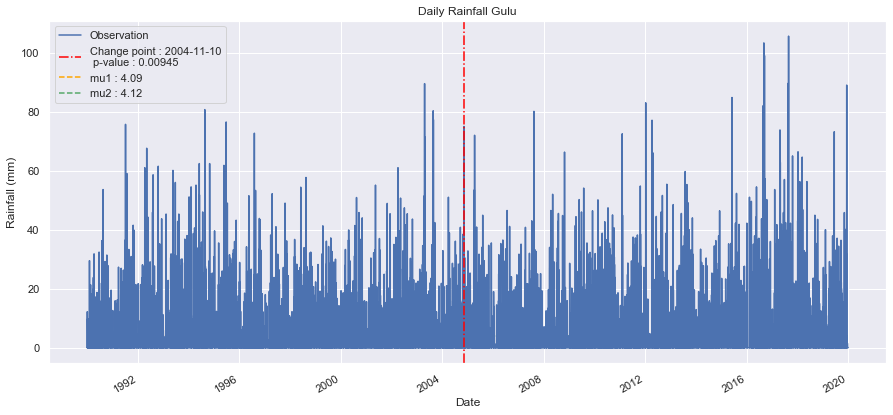

In [ ]:
result = pettitt_res

mn = rf['Gulu'].index[0]
mx = rf['Gulu'].index[-1]

loc = pd.to_datetime(result.cp)
mu1 = result.avg.mu1
mu2 = result.avg.mu2


rf['Gulu'].plot(figsize=(15,7), label="Observation")
plt.hlines(mu1, xmin=mn, xmax=loc, linestyles='--', colors='orange',lw=1.5, label='mu1 : ' + str(round(mu1,2)))
plt.hlines(mu2, xmin=loc, xmax=mx, linestyles='--', colors='g', lw=1.5, label='mu2 : ' + str(round(mu2,2)))
plt.axvline(x=loc, linestyle='-.' , color='red', lw=1.5, label='Change point : '+ loc.strftime('%Y-%m-%d') + '\n p-value : ' + str(result.p))

plt.title('Daily Rainfall Gulu')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.legend()

# # Computation of statistics: Gulu rainfall

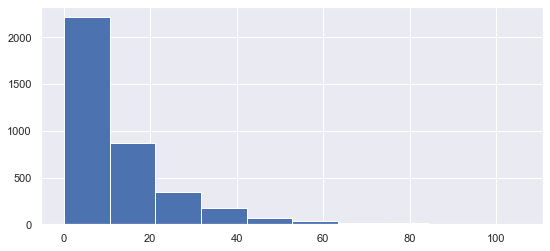

In [ ]:
rf.Gulu[rf.Gulu>0].hist(figsize=(9,4))

In [ ]:
sturges = lambda n: int(np.log2(n) + 1)
square_root = lambda n: int(np.sqrt(n))
from scipy.stats import kurtosis
doanes = lambda data: int(1 + np.log(len(data)) + np.log(1 + kurtosis(data) * (len(data) / 6.) ** 0.5))

n = len(rf)
sturges(n), square_root(n), doanes(rf.Gulu.dropna())

(14, 104, 16)

In [ ]:
promedio = rf.Gulu.mean()
desviacion = rf.Gulu.std()
#Then, we calculate the correspondent statistical distribution
tabulaciones=np.arange(-40,51,0.1)
distnormal = stats.norm.pdf(tabulaciones, loc=promedio, scale=desviacion)
distlognormal = stats.pearson3.pdf(tabulaciones,skew=1,loc=promedio, scale=desviacion)

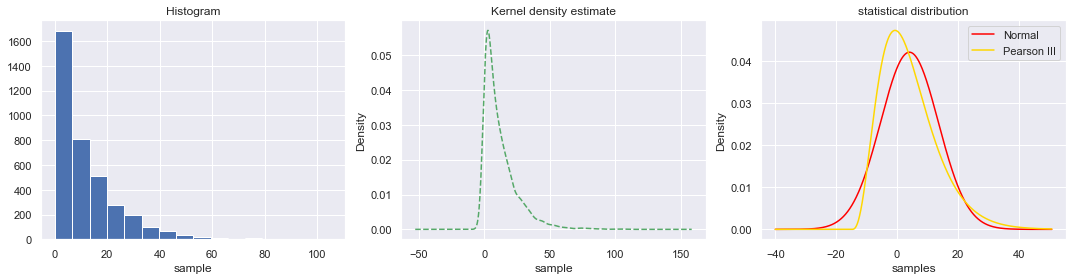

In [ ]:
fig = plt.figure(figsize=(15,4))

#Plot for Gulu histogram
ax1 = fig.add_subplot(131)
rf.Gulu[rf.Gulu>0].hist(bins=doanes(rf.Gulu.dropna()))
ax1.set_xlabel('sample')
#ax1.set_ylabel('cumulative sum')
ax1.set_title("Histogram")
#density Plot
ax2 = fig.add_subplot(132)
rf.Gulu[rf.Gulu>0].dropna().plot(kind='kde', style='g--')
#plt.xlim=(-2,100)
ax2.set_title("Kernel density estimate")
ax2.set_xlabel('sample')
#Plot for Gulu calculated statistical distribution
ax3 = fig.add_subplot(133)
plt.plot(tabulaciones,distnormal, color='red', label='Normal')
plt.plot(tabulaciones,distlognormal, color='gold', label='Pearson III')
ax3.set_title("statistical distribution")
ax3.set_xlabel('samples')
ax3.set_ylabel('Density')
#plt.xlim(0,60)
plt.legend(loc='upper right')
plt.tight_layout()

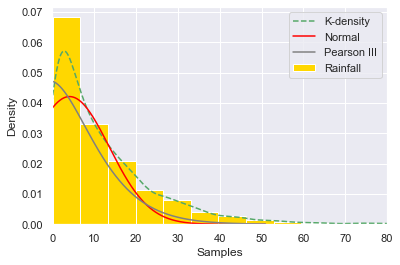

In [ ]:
#Combined Plots
rf.Gulu[rf.Gulu>0].hist(bins=doanes(rf.Gulu.dropna()), density = True, color='gold', label='Rainfall')
rf.Gulu[rf.Gulu>0].dropna().plot(kind='kde', xlim=(0,80), Label ='kernel density estimate', style='g--', label='K-density')
plt.plot(tabulaciones,distnormal, color='red', label='Normal')
plt.plot(tabulaciones,distlognormal, color='grey', label='Pearson III')
plt.xlabel('Samples')
plt.legend(loc='upper right')

# Quantile @ 80%

In [ ]:
#Trimmed data
rf['Gulu'].quantile(0.8)

5.9

In [ ]:
rf_Gucut=rf.Gulu[(rf.Gulu<5.9)]
rf_Gucut.describe()

count    8762.000000
mean        0.418649
std         1.155358
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.800000
Name: Gulu, dtype: float64

In [ ]:
sturges = lambda n: int(np.log2(n) + 1)
square_root = lambda n: int(np.sqrt(n))
from scipy.stats import kurtosis
doanes = lambda data: int(1 + np.log(len(data)) + np.log(1 + kurtosis(data) * (len(data) / 6.) ** 0.5))

n = len(rf_Gucut)
sturges(n), square_root(n), doanes(rf_Gucut.dropna())

(14, 93, 15)

In [ ]:
#Trimmed data statistical computations
promedio_cut=rf_Gucut.mean()
desviacion_cut=rf_Gucut.std()
tabulaciones_cut=np.arange(-10,20,0.1)
distnormal_cut = stats.norm.pdf(tabulaciones_cut, loc=promedio_cut, scale=desviacion_cut)
distlognormal_cut = stats.pearson3.pdf(tabulaciones_cut,skew=1,loc=promedio_cut, scale=desviacion_cut)

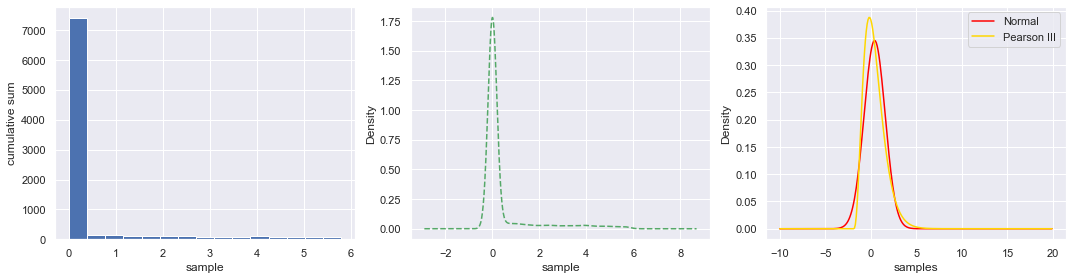

In [ ]:
fig = plt.figure(figsize=(15,4))

#Plot for Gulu histogram with 80% quantile
ax1 = fig.add_subplot(131)
rf_Gucut.hist(bins=doanes(rf_Gucut.dropna()))
ax1.set_xlabel('sample')
ax1.set_ylabel('cumulative sum')
#ax1.set_title("Q80 distrubution")
#density Plot with 80% quantile
ax2 = fig.add_subplot(132)
rf_Gucut.dropna().plot(kind='kde', style='g--')
#plt.xlim=(-2,100)
#ax2.set_title("Kernel density estimate for Q80")
ax2.set_xlabel('sample')
#Plot for Gulu with 80% quantile calculated statistical distribution
ax3 = fig.add_subplot(133)
plt.plot(tabulaciones_cut,distnormal_cut, color='red', label='Normal')
plt.plot(tabulaciones_cut,distlognormal_cut, color='gold', label='Pearson III')
#ax3.set_title("statistical distribution for Q80")
ax3.set_xlabel('samples')
ax3.set_ylabel('Density')
#plt.xlim(0,60)
plt.legend(loc='upper right')
plt.tight_layout()

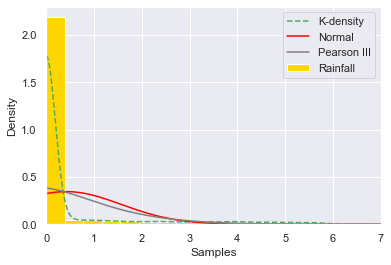

In [ ]:
#Combined Plots
rf_Gucut.hist(bins=doanes(rf_Gucut.dropna()), density = True, color='gold', label='Rainfall')
rf_Gucut.dropna().plot(kind='kde', style='g--', xlim=(0,7), label = 'K-density')
plt.plot(tabulaciones_cut,distnormal_cut, color='red', label='Normal')
plt.plot(tabulaciones_cut,distlognormal_cut, color='grey', label='Pearson III')
plt.xlabel('Samples')
plt.legend(loc='upper right')

# # Annual extremes and exceedence series: Gulu

# Adding year, month and day columns & create Gulu file

In [ ]:
rf['year'] = rf.index.year
rf['month'] = rf.index.month
rf['day'] = rf.index.day
#rf.columns
#rf['hour'] = rf.index.hour
#rf.set_index(['day'])

In [ ]:
rf = rf[['year', 'month', 'day','Gulu', 'Lira', 'Soroti', 'Moroto', 'Mbale', 'Tororo', 'Jinja',
       'Entebbe', 'Masaka', 'Mbarara', 'Kabale', 'Hoima', 'Fortportal',
       'Kitgum', 'Apac', 'Busia', 'Kamuli', 'Lugazi', 'Mubende', 'Ntugamo',
       'Kasese']]

In [ ]:
rfg=rf[['year', 'month','day','Gulu']]
rfgu =rfg.copy()
#rfgul.to_csv('Trials.csv')

# # Find the best distribution model that fits the observed RF

In [ ]:
#year_date = np.zeros(df.shape[0], dtype=np.int)
#for i in range(df.shape[0]):
#    year_date[i]= pd.to_datetime(df.date[i]).year
year_new = np.unique(rfgu.year)

# Sum rainfall for each year

In [ ]:
prcp = np.zeros(year_new.shape[0])
for i in range(year_new.shape[0]):
    prcp[i] = format(rfgu.loc[rfgu['year'] == year_new[i], 'Gulu'].sum(), '0.2f')

In [ ]:
total = pd.concat([pd.DataFrame(year_new, columns=['Year']), pd.DataFrame(prcp, columns=['Total_P'])], axis=1 )

# Calculate the Return year

In [ ]:
max_rain = rfgu.groupby(['year'])['Gulu'].max().reset_index()
max_rain

,year,Gulu
0,1990,53.6
1,1991,75.7
2,1992,67.6
3,1993,60.1
4,1994,80.7
5,1995,76.5
6,1996,72.7
7,1997,52.2
8,1998,57.7
9,1999,41.3


In [ ]:
sort_rain = max_rain.sort_values(by =['Gulu'], ascending=False).reset_index(drop=True)
sort_rain

In [ ]:
rank = np.zeros((len(sort_rain), 3))
for i in range(len(sort_rain)):
    rank[i, 0] = i + 1
    rank[i, 1] = (i + 1)/(len(sort_rain)+1)
    rank[i, 2] = 1/rank[i, 1]

rank = pd.DataFrame(rank, columns=['rank', 'probability', 'return_year'])
rank[['rank', 'return_year']] = rank[['rank', 'return_year']].astype(int)
rank_rain = pd.concat([sort_rain, rank], axis=1)

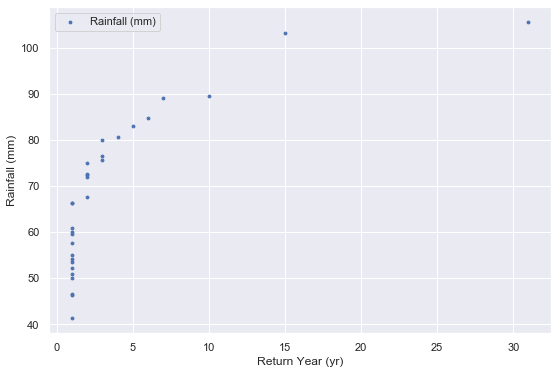

In [ ]:
plt.figure(figsize=(9, 6))
plt.scatter(rank_rain['return_year'], rank_rain['Gulu'], s=8, color = 'b', label = 'Rainfall (mm)')
plt.legend()
plt.xlabel('Return Year (yr)')
plt.ylabel('Rainfall (mm)')
plt.show()

In [ ]:
rain = np.array(rank_rain['Gulu'])
std = np.std(rain)
u = np.mean(rain)
skew = sp.skew(np.log10(rain))
re_year = np.array(rank_rain['return_year'])

In [ ]:
z = np.zeros(len(re_year))
k3 = np.zeros(len(re_year))
lp3 = np.zeros(len(re_year))

for i in range(len(k3)):
    if re_year[i] != 1:
        z[i] = sp.norm.ppf(1-(1/re_year[i]))
        k3[i] = -(np.sqrt(6)/np.pi)*(0.5772 + np.log(np.log(re_year[i]/(re_year[i]-1)))) 
    else:
        z[i] = sp.norm.ppf(1-(1/(re_year[i]+0.1)))
        k3[i] = -(np.sqrt(6)/np.pi)*(0.5772 + np.log(np.log((re_year[i]+0.1)/(re_year[i]+0.1-1))))
    lp3[i] = 2/skew * (np.power((z[i] - skew/6)*skew/6+1, 3)-1)

In [ ]:
model_rain = np.zeros((len(rain), 3))
for i in range(len(model_rain)):
    model_rain[i][0] = u + z[i]* std
    model_rain[i][1] = u + k3[i] * std
    model_rain[i][2] = np.power(10, np.mean(np.log10(rain)) + lp3[i] * np.std(np.log10(rain)))
pd_rain = pd.DataFrame(model_rain, columns=['Normal', 'Gumbel', 'PearsonIII'])
total_rain = pd.concat([pd_rain, rank_rain], axis=1)
total_rain.to_csv('Gulu_fit_models.csv')
total_rain

,Normal,Gumbel,PearsonIII,year,Gulu,rank,probability,return_year
0,98.457575,104.427136,103.205601,2017,105.6,1,0.032258,31
1,92.790878,94.969255,94.982683,2016,103.3,2,0.064516,15
2,89.211028,89.586269,90.131341,2003,89.5,3,0.096774,10
3,85.721734,84.747985,85.642907,2019,89.0,4,0.129032,7
4,84.088649,82.614021,83.620213,2015,84.8,5,0.161290,6
5,82.037278,80.045207,81.147466,2012,83.0,6,0.193548,5
6,79.311939,76.815291,77.975824,1994,80.7,7,0.225806,4
7,75.337013,72.452056,73.572378,2007,80.1,8,0.258065,3
8,75.337013,72.452056,73.572378,1995,76.5,9,0.290323,3
9,75.337013,72.452056,73.572378,1991,75.7,10,0.322581,3


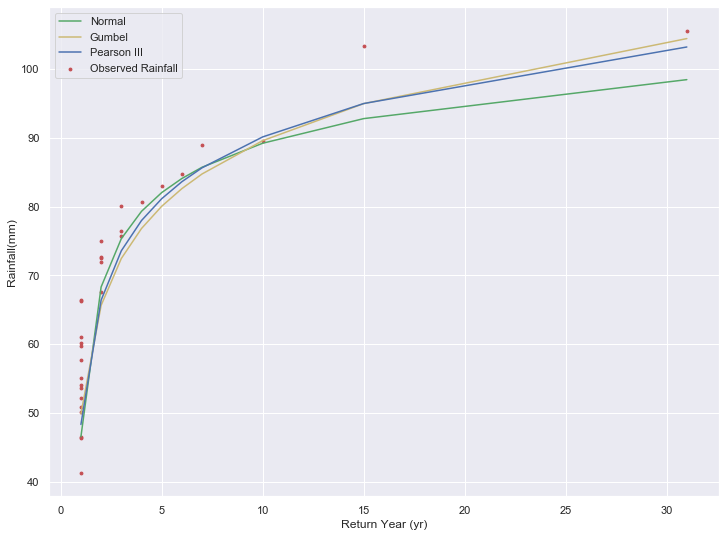

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(total_rain['return_year'], total_rain['Normal'], color = 'g', label = 'Normal')
plt.plot(total_rain['return_year'], total_rain['Gumbel'], color = 'y', label = 'Gumbel')
plt.plot(total_rain['return_year'], total_rain['PearsonIII'], color = 'b', label = 'Pearson III')
plt.scatter(total_rain['return_year'], total_rain['Gulu'], s=8, color= 'r' , label = 'Observed Rainfall')
plt.legend()
plt.xlabel('Return Year (yr)')
plt.ylabel('Rainfall(mm)')
plt.show()

# Model Selection

In [ ]:
# Using mean square error (MSE)
se = np.zeros((len(total_rain), 3))
for i in range(len(total_rain)):
    se[i][0] = np.square(total_rain.Gulu[i]-total_rain.Normal[i])
    se[i][1] = np.square(total_rain.Gulu[i]-total_rain.Gumbel[i])
    se[i][2] = np.square(total_rain.Gulu[i]-total_rain.PearsonIII[i])
mse = pd.DataFrame(np.average(se, axis=0), index=['Normal', 'Gumbel', 'Pearson III'], columns=['MSE'])
mse

,MSE
Normal,68.071670
Gumbel,50.881144
Pearson III,56.458818


In [ ]:
print('The best model is', list(mse.idxmin()), 'and the MSE is', list(mse.min()))

The best model is ['Gumbel'] and the MSE is [50.88114358795563]


# Generating IDF curve

In [ ]:
rfgul =rfgu.pivot_table(index=["year", "month"], #Changing the dataset topling#
                    columns='day', 
                    values='Gulu').reset_index()

rfgul.to_csv('gulu1.csv')

In [ ]:
gulr = pd.read_csv("gulu_dd.csv")
data = np.zeros((30, 31)) 
FinalData = np.zeros((6, 7)) 

In [ ]:
for i in range(30):
    df1 = (((gulr.where(gulr['Year']==i+1)).dropna()).drop(['Year','Month'],axis=1)).T
    for j in range(31):
        data[i][j] = max((df1.rolling(j+1).sum()).max())
data1 = pd.DataFrame(data=data[:,[0,2,4,9,14,29]],index=range(1,31),columns=[24,72,120,240,360,720])
data1       

,24,72,120,240,360,720
1,53.6,89.9,101.1,140.8,200.8,264.5
2,75.7,113.4,119.9,156.2,166.9,306.3
3,67.6,111.6,143.2,206.1,221.6,253.7
4,60.1,90.3,90.3,127.4,172.2,233.0
5,80.7,98.9,112.9,161.5,218.9,268.2
6,61.8,95.8,105.5,118.1,136.7,181.6
7,72.7,90.8,106.2,141.1,171.1,287.5
8,49.0,68.6,105.4,142.9,172.0,206.3
9,57.7,63.4,86.2,119.7,138.0,185.8
10,37.2,51.2,71.2,135.9,149.2,219.5


In [ ]:
MeanStd = pd.DataFrame([data1.mean(axis = 0),data1.std(ddof = 1,axis = 0)],index = ['Mean', 'Std'])
MeanStd

,24,72,120,240,360,720
Mean,62.753333,82.910000,100.696667,138.196667,167.450000,224.563333
Std,15.905513,21.626107,22.602235,32.676729,41.391051,49.650034


In [ ]:
Kt= []
for i in [2,5,10,25,50,75,100]:
    Kt.append(-1*math.sqrt(6)/math.pi*(0.5772+math.log(math.log(i/(i-1)))))
Kt = pd.DataFrame(np.transpose(Kt),index=['2','5','10','25','50', '75','100'],columns=['K_T']).T
Kt

,2,5,10,25,50,75,100
K_T,-0.164272,0.719457,1.304563,2.043846,2.592288,2.911064,3.136681


In [ ]:
for i in range(6):
    for j in range(7):
        FinalData[i][j] =( 
            round(((MeanStd.iloc[0]).iloc[i]+(Kt.iloc[0]).iloc[j]*(MeanStd.iloc[1]).iloc[i])))
FinalData_df = pd.DataFrame(FinalData,index = ['1', '3','5','10','15','30'],columns = ['2','5','10','25','50', '75','100'])
FinalData_df.to_csv("Gulu1D.csv") 

In [ ]:
RetPer = []
for i in range(6):
    RetPer.append(2)
    RetPer.append(5)
    RetPer.append(10)
    RetPer.append(25)
    RetPer.append(50)    
Dur = []
for i in [1,3,5,10,15,30]:
    for j in range(5):
        Dur.append(i)
Y = np.array(np.log(0.1*FinalData.ravel()))
a = 1.2
X = np.transpose([np.ones(30),np.array(np.log((RetPer))), np.log(np.array(Dur) + a)])
coef = np.dot(np.dot(np.array(np.linalg.inv((np.dot( np.transpose(X),X)))),np.transpose(X)),Y)
k = math.exp(coef[0])
x = (coef[1])
n = -(coef[2])
def f(Dur,ret):
    return (k*(ret**x)/((Dur+a)**n))

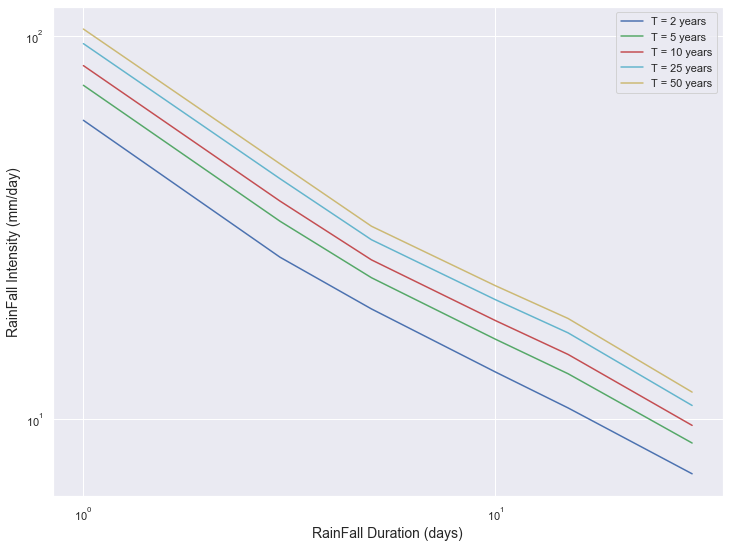

In [ ]:
fig = plt.figure(figsize=(12, 9))
ax = plt.subplot(111)
Duration = np.array([1,3,5,10,15,30])
ax.plot(Duration,FinalData[:,0],linestyle='-', color='b',label = 'T = 2 years')
ax.plot(Duration,FinalData[:,1],linestyle='-', color='g',label = 'T = 5 years')
ax.plot(Duration,FinalData[:,2],linestyle='-', color='r',label = 'T = 10 years')
ax.plot(Duration,FinalData[:,3],linestyle='-', color='c',label = 'T = 25 years')
ax.plot(Duration,FinalData[:,4],linestyle='-', color='y',label = 'T = 50 years')
# plt.plot(np.arange(1,25,1), 10*f(np.arange(1,25,1)), 'o-', 'k')
plt.yscale("log")
plt.xscale("log")
plt.ylabel('RainFall Intensity (mm/day)', fontsize=14)
plt.xlabel('RainFall Duration (days)', fontsize=14)
ax.legend()
plt.grid(True)
plt.savefig('GuluPlot1.pdf')  
plt.show()


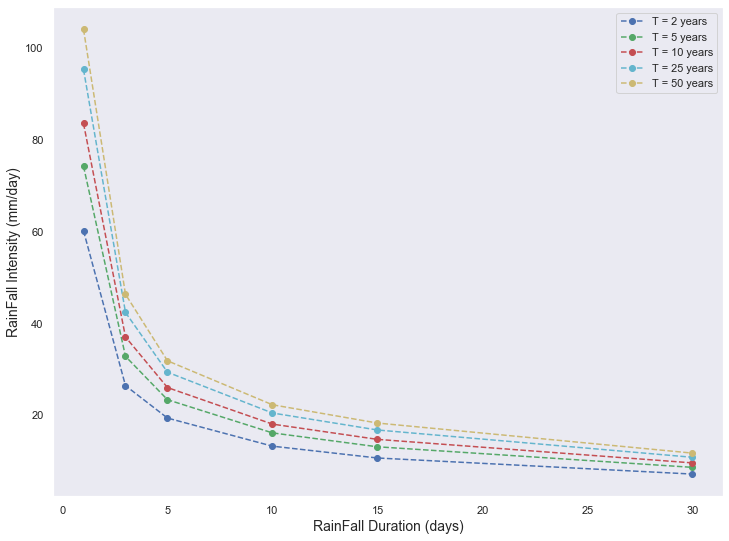

In [ ]:
fig = plt.figure(figsize=(12, 9))
ax = plt.subplot(111)
Duration = np.array([1,3,5,10,15,30])
ax.plot(Duration,FinalData[:,0],linestyle='--', marker='o', color='b',label = 'T = 2 years')
ax.plot(Duration,FinalData[:,1],linestyle='--', marker='o', color='g',label = 'T = 5 years')
ax.plot(Duration,FinalData[:,2],linestyle='--', marker='o', color='r',label = 'T = 10 years')
ax.plot(Duration,FinalData[:,3],linestyle='--', marker='o', color='c',label = 'T = 25 years')
ax.plot(Duration,FinalData[:,4],linestyle='--', marker='o', color='y',label = 'T = 50 years')
# plt.plot(np.arange(1,25,1), 10*f(np.arange(1,25,1)), 'o-', 'k')
plt.ylabel('RainFall Intensity (mm/day)', fontsize=14)
plt.xlabel('RainFall Duration (days)', fontsize=14)
ax.legend()
plt.grid()
plt.savefig('GuluPlot.pdf')  
plt.show()


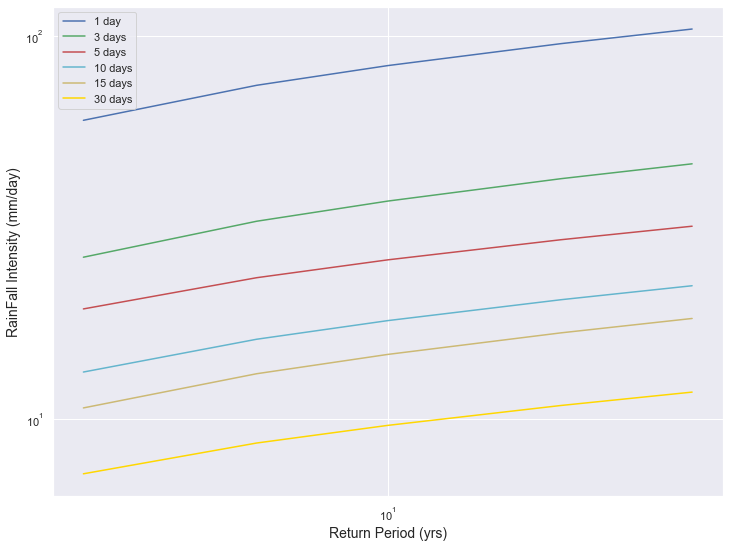

In [ ]:
fig = plt.figure(figsize=(12, 9))
ax = plt.subplot(111)
rt = FinalData.T
T = np.array([2,5,10,25,50])
ax.plot(T,rt[:,0],linestyle='-', color='b',label = '1 day')
ax.plot(T,rt[:,1],linestyle='-', color='g',label = '3 days')
ax.plot(T,rt[:,2],linestyle='-', color='r',label = '5 days')
ax.plot(T,rt[:,3],linestyle='-', color='c',label = '10 days')
ax.plot(T,rt[:,4],linestyle='-', color='y',label = '15 days')
ax.plot(T,rt[:,5],linestyle='-', color='gold',label = '30 days')

plt.yscale("log")
plt.xscale("log")
plt.ylabel('RainFall Intensity (mm/day)', fontsize=14)
plt.xlabel('Return Period (yrs)', fontsize=14)
ax.legend()
#plt.grid()
plt.savefig('GuluPlot2.pdf')  
plt.show()


# Using Empirical Formula

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


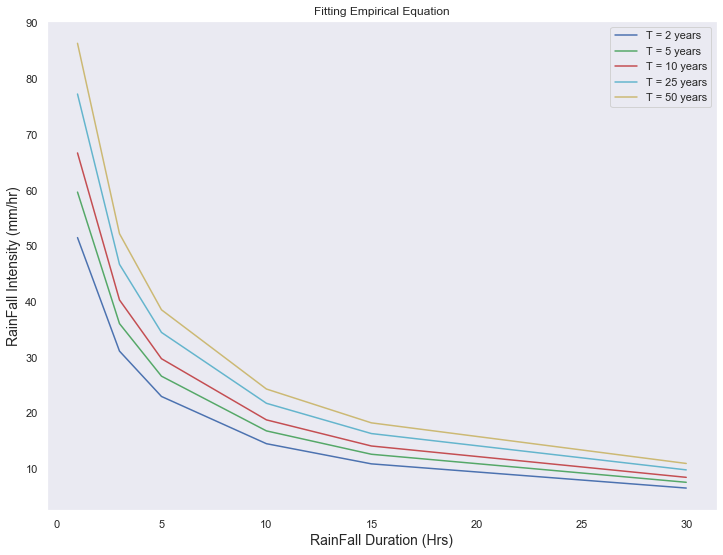

In [ ]:
fig = plt.figure(figsize=(12, 9))
ax = plt.subplot(111)
Duration = np.array([1,3,5,10,15,30])
ax.plot(Duration,10*f(Duration,2),linestyle='-', color='b', label = 'T = 2 years')
ax.plot(Duration,10*f(Duration,5),linestyle='-',  color='g',label = 'T = 5 years')
ax.plot(Duration,10*f(Duration,10),linestyle='-', color='r',label = 'T = 10 years')
ax.plot(Duration,10*f(Duration,25),linestyle='-', color='c',label = 'T = 25 years')
ax.plot(Duration,10*f(Duration,50),linestyle='-', color='y',label = 'T = 50 years')
plt.ylabel('RainFall Intensity (mm/hr)', fontsize=14)
plt.xlabel('RainFall Duration (Hrs)', fontsize=14)
ax.legend()
ax.set_title('Fitting Empirical Equation')
plt.grid()
plt.savefig('GuluEmpirical.pdf')  
plt.show()



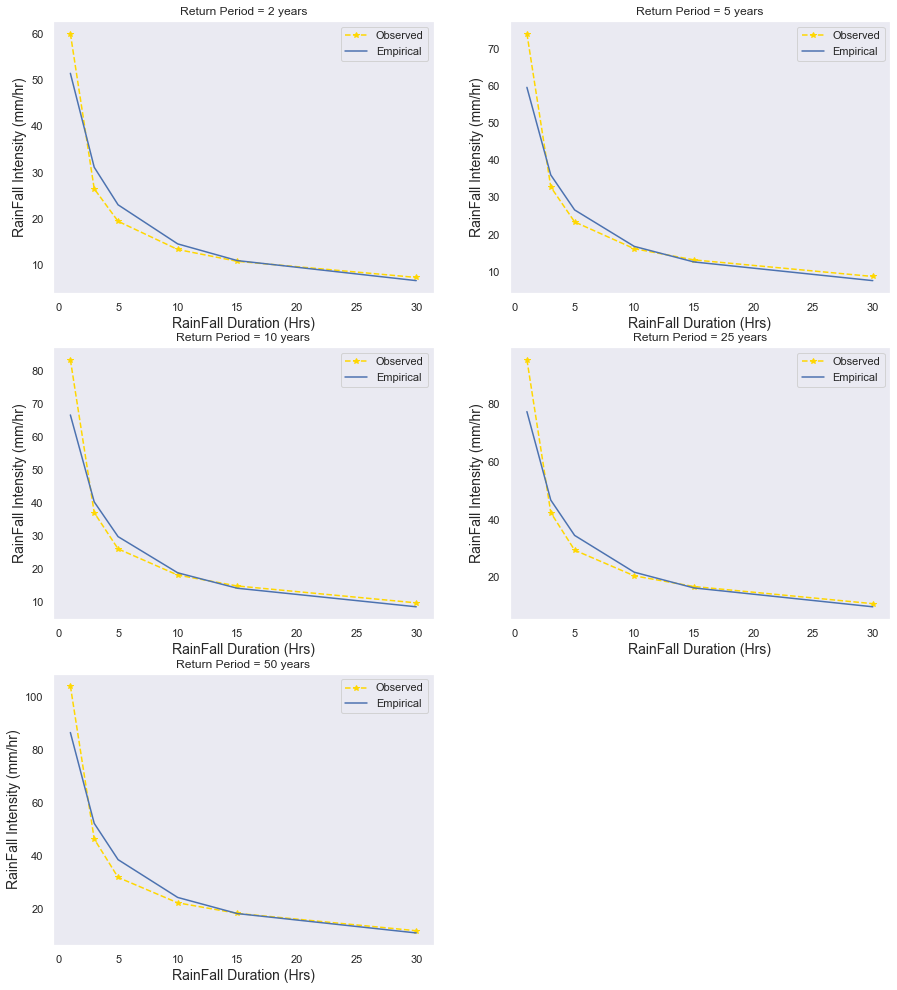

In [ ]:
Duration = np.array([1,3,5,10,15,30])
plt.figure(figsize=(15,17))
ax = plt.subplot(3,2,1)
ax.plot(Duration,FinalData[:,0],linestyle='--', marker='*', color='gold',label = 'Observed')
ax.plot(Duration,10*f(Duration,2),linestyle='-', color='b',label = 'Empirical')
plt.ylabel('RainFall Intensity (mm/hr)', fontsize=14)
plt.xlabel('RainFall Duration (Hrs)', fontsize=14)
ax.legend()
plt.grid()
ax.set_title("Return Period = 2 years")
ax = plt.subplot(3,2,2)
ax.plot(Duration,FinalData[:,1],linestyle='--', marker='*', color='gold',label = 'Observed')
ax.plot(Duration,10*f(Duration,5),linestyle='-', color='b',label = 'Empirical')
plt.ylabel('RainFall Intensity (mm/hr)', fontsize=14)
plt.xlabel('RainFall Duration (Hrs)', fontsize=14)
ax.legend()
plt.grid()
ax.set_title("Return Period = 5 years")
ax = plt.subplot(3,2,3)
ax.plot(Duration,FinalData[:,2],linestyle='--', marker='*', color='gold',label = 'Observed')
ax.plot(Duration,10*f(Duration,10),linestyle='-', color='b',label = 'Empirical')
plt.ylabel('RainFall Intensity (mm/hr)', fontsize=14)
plt.xlabel('RainFall Duration (Hrs)', fontsize=14)
ax.legend()
ax.set_title("Return Period = 10 years")
plt.grid()
ax = plt.subplot(3,2,4)
ax.plot(Duration,FinalData[:,3],linestyle='--', marker='*', color='gold',label = 'Observed')
ax.plot(Duration,10*f(Duration,25),linestyle='-', color='b',label = 'Empirical')
plt.ylabel('RainFall Intensity (mm/hr)', fontsize=14)
plt.xlabel('RainFall Duration (Hrs)', fontsize=14)
ax.legend()
ax.set_title("Return Period = 25 years")
plt.grid()
ax = plt.subplot(3,2,5)
ax.plot(Duration,FinalData[:,4],linestyle='--', marker='*', color='gold',label = 'Observed')
ax.plot(Duration,10*f(Duration,50),linestyle='-', color='b',label = 'Empirical')
plt.ylabel('RainFall Intensity (mm/hr)', fontsize=14)
plt.xlabel('RainFall Duration (Hrs)', fontsize=14)
ax.legend()
ax.set_title("Return Period = 50 years")
plt.grid()
plt.savefig('Gulu.pdf')

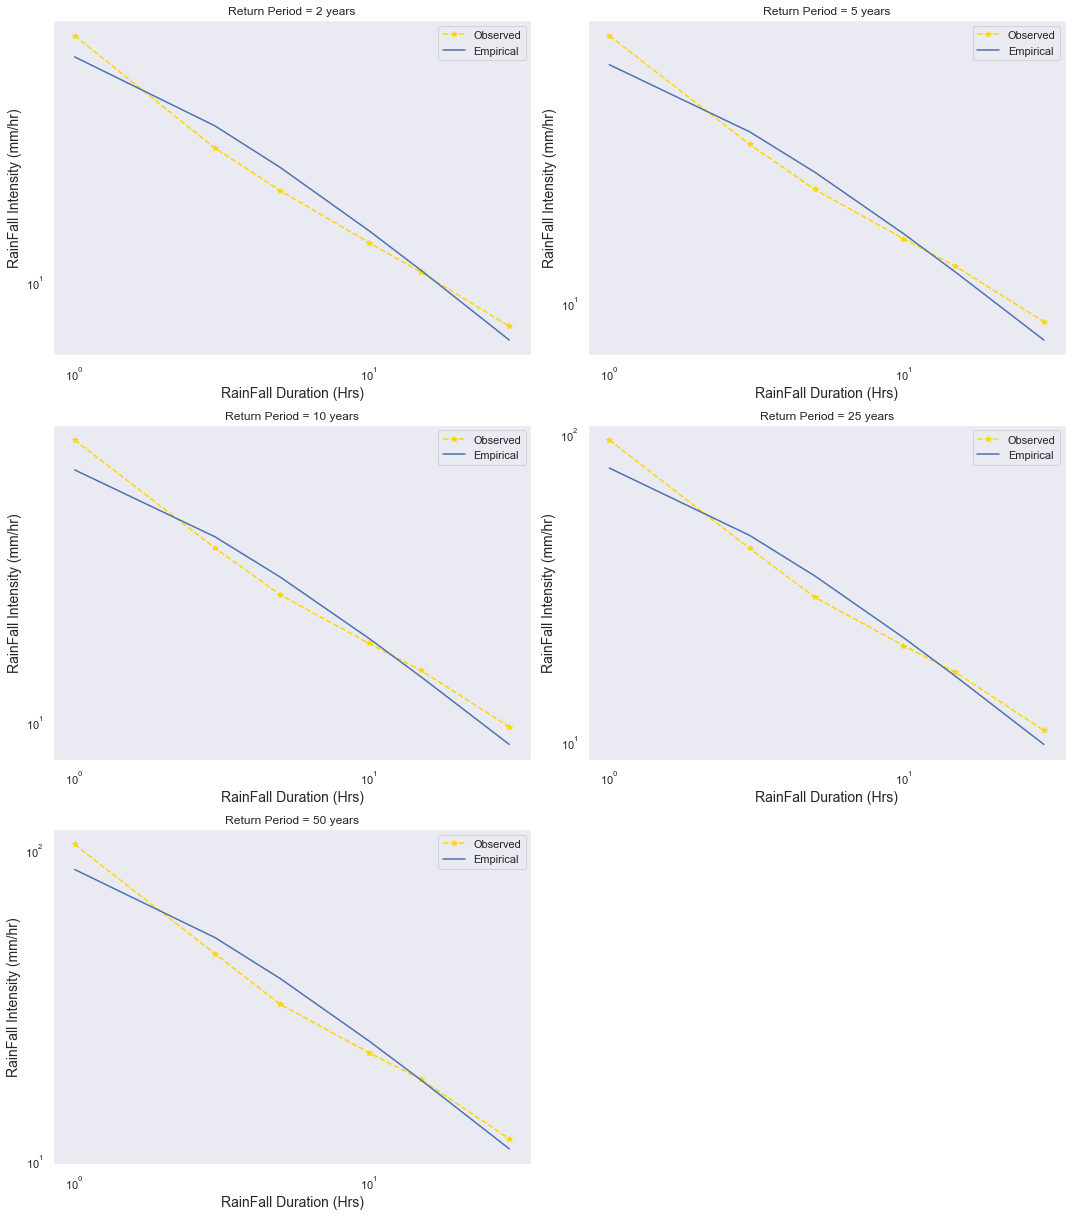

In [ ]:
Duration = np.array([1,3,5,10,15,30])
plt.figure(figsize=(15,17))
ax = plt.subplot(3,2,1)
ax.plot(Duration,FinalData[:,0],linestyle='--', marker='*', color='gold',label = 'Observed')
ax.plot(Duration,10*f(Duration,2),linestyle='-', color='b',label = 'Empirical')
plt.yscale("log")
plt.xscale("log")
plt.ylabel('RainFall Intensity (mm/hr)', fontsize=14)
plt.xlabel('RainFall Duration (Hrs)', fontsize=14)
ax.legend()
plt.grid()
ax.set_title("Return Period = 2 years")
ax = plt.subplot(3,2,2)
ax.plot(Duration,FinalData[:,1],linestyle='--', marker='*', color='gold',label = 'Observed')
ax.plot(Duration,10*f(Duration,5),linestyle='-', color='b',label = 'Empirical')
plt.yscale("log")
plt.xscale("log")
plt.ylabel('RainFall Intensity (mm/hr)', fontsize=14)
plt.xlabel('RainFall Duration (Hrs)', fontsize=14)
ax.legend()
plt.grid()
ax.set_title("Return Period = 5 years")
ax = plt.subplot(3,2,3)
ax.plot(Duration,FinalData[:,2],linestyle='--', marker='*', color='gold',label = 'Observed')
ax.plot(Duration,10*f(Duration,10),linestyle='-', color='b',label = 'Empirical')
plt.yscale("log")
plt.xscale("log")
plt.ylabel('RainFall Intensity (mm/hr)', fontsize=14)
plt.xlabel('RainFall Duration (Hrs)', fontsize=14)
ax.legend()
ax.set_title("Return Period = 10 years")
plt.grid()
ax = plt.subplot(3,2,4)
ax.plot(Duration,FinalData[:,3],linestyle='--', marker='*', color='gold',label = 'Observed')
ax.plot(Duration,10*f(Duration,25),linestyle='-', color='b',label = 'Empirical')
plt.yscale("log")
plt.xscale("log")
plt.ylabel('RainFall Intensity (mm/hr)', fontsize=14)
plt.xlabel('RainFall Duration (Hrs)', fontsize=14)
ax.legend()
ax.set_title("Return Period = 25 years")
plt.grid()
ax = plt.subplot(3,2,5)
ax.plot(Duration,FinalData[:,4],linestyle='--', marker='*', color='gold',label = 'Observed')
ax.plot(Duration,10*f(Duration,50),linestyle='-', color='b',label = 'Empirical')
plt.yscale("log")
plt.xscale("log")
plt.ylabel('RainFall Intensity (mm/hr)', fontsize=14)
plt.xlabel('RainFall Duration (Hrs)', fontsize=14)
ax.legend()
ax.set_title("Return Period = 50 years")
plt.grid()
plt.tight_layout()
plt.savefig('Gulu1.pdf')